In [22]:
import matplotlib.pyplot as plt
import csv
from hv import HyperVolume
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def parse_csv(filename):
    with open(filename, 'r') as file:
        data = {}
        for index, row in enumerate(file):
            if row.strip():
                area, delay = map(float, row.strip().split()[-2:])
                data[index] = (delay, area)
        return data


def calculate_hypervolume(pareto_points, reference_point):
    unique_pareto_points = sorted(set(map(tuple, pareto_points)))
    hypervolume = 0
    for i in range(len(unique_pareto_points)):
        width = (reference_point[0] - unique_pareto_points[i][0]) if i == 0 else (unique_pareto_points[i-1][0] - unique_pareto_points[i][0])
        height = reference_point[1] - unique_pareto_points[i][1]
        hypervolume += width * height
    return abs(hypervolume)


def find_pareto_frontier(x_values, y_values, maximize_x=False, maximize_y=False):
    sorted_points = sorted(zip(x_values, y_values), reverse=maximize_y)
    pareto_front = [sorted_points[0]]
    for point in sorted_points[1:]:
        if (maximize_y and point[1] >= pareto_front[-1][1]) or (not maximize_y and point[1] <= pareto_front[-1][1]):
            pareto_front.append(point)
    return sorted(pareto_front, key=lambda x: x[0], reverse=maximize_x)


def plot_pareto_frontier(filename1, filename2, filename3=None, title=None, output_filename=None):
    data1 = parse_csv(filename1)
    delays1, areas1 = zip(*data1.values())

    data2 = parse_csv(filename2)
    delays2, areas2 = zip(*data2.values())

    pareto1 = find_pareto_frontier(delays1, areas1)
    pareto_x1, pareto_y1 = zip(*pareto1)

    pareto2 = find_pareto_frontier(delays2, areas2)
    pareto_x2, pareto_y2 = zip(*pareto2)

    max_delay, max_area = max(delays1 + delays2), max(areas1 + areas2)

    if filename3:
        data3 = parse_csv(filename3)
        delays3, areas3 = zip(*data3.values())
        pareto3 = find_pareto_frontier(delays3, areas3)
        pareto_x3, pareto_y3 = zip(*pareto3)
        max_delay, max_area = max(max_delay, max(delays3)), max(max_area, max(areas3))

    reference_point = [max_delay, max_area]
    hypervolume = HyperVolume(reference_point)
    result1 = hypervolume.compute(list(map(list, set(map(tuple, pareto1)))))
    result2 = hypervolume.compute(list(map(list, set(map(tuple, pareto2)))))
    if filename3:
        result3 = hypervolume.compute(list(map(list, set(map(tuple, pareto3)))))
        ratio_complete = result1 / result3
        print(f'The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is {ratio_complete:.2f}.')
    ratio = result1 / result2

    print(f'The reference point is {reference_point}.')
    print(f'The Pareto points of ABC are {list(set(map(tuple, pareto1)))}.')
    print(f'The Pareto points of EsynTurbo are {list(set(map(tuple, pareto2)))}.')
    print(f'The hypervolume of ABC is {result1:.2f}, and the hypervolume of EsynTurbo is {result2:.2f}.')
    print(f'The hypervolume ratio of ABC/EsynTurbo is {ratio:.2f}.')

    plt.figure(figsize=(10, 8))
    plt.scatter(delays1, areas1, color='blue', label='ABC Points', alpha=0.7, marker='o')
    plt.scatter(delays2, areas2, color='green', label='EsynTurbo Points', alpha=0.7, marker='^')
    plt.plot(pareto_x1, pareto_y1, color='red', label='ABC Frontier', linewidth=6)
    plt.plot(pareto_x2, pareto_y2, color='orange', label='EsynTurbo Frontier', linewidth=6)

    if filename3:
        plt.scatter(delays3, areas3, color='purple', label='EsynTurbo w.o. Opt. Points', alpha=0.7, marker='s')
        plt.plot(pareto_x3, pareto_y3, color='cyan', label='EsynTurbo w.o. Opt. Frontier', linewidth=6)

    plt.xlabel('Delay', fontsize=23)
    plt.ylabel('Area', fontsize=23)
    plt.title(title, fontsize=28)
    plt.legend(fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(labelsize=20)
    plt.tight_layout()

    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()


# Usage - Test

# plot_pareto_frontier(
#     '../fuzz_abc_opt_flow/stats_ori_adder_500.txt',
#     '../fuzz_abc_opt_flow/stats_opt_adder_400.txt',
#     #None,
#     '../fuzz_abc_opt_flow/stats_opt_adder_without_pass_400.txt',  # Optional
#     'Delay vs Area with Pareto Frontiers for Adder',
#     '../fuzz_abc_opt_flow/EPFL_test_pareto.pdf'
# )


## Generate HyperVolume plot for the results of E-Synturbo vs. ABC

The reference point is [3145.0, 1436.0].
The Pareto points of ABC are [(3071.0, 861.0), (2544.0, 1135.0), (3073.0, 861.0), (3081.0, 857.0), (3068.0, 864.0), (2538.0, 1158.0), (3037.0, 870.0), (2503.0, 1223.0), (3060.0, 868.0), (3069.0, 861.0)].
The Pareto points of EsynTurbo are [(2337.0, 1034.0), (3050.0, 866.0), (2993.0, 872.0), (2188.0, 1042.0), (1009.0, 1434.0), (2820.0, 928.0), (3056.0, 863.0), (3061.0, 862.0), (2718.0, 932.0), (3064.0, 861.0), (2914.0, 916.0), (2945.0, 897.0), (1297.0, 1217.0), (1502.0, 1204.0), (2893.0, 920.0), (1547.0, 1178.0), (1230.0, 1245.0), (2106.0, 1068.0), (1128.0, 1289.0), (2453.0, 1002.0), (3060.0, 862.0), (2639.0, 994.0)].
The hypervolume of ABC is 219606.00, and the hypervolume of EsynTurbo is 706793.00.
The hypervolume ratio of ABC/EsynTurbo is 0.31.


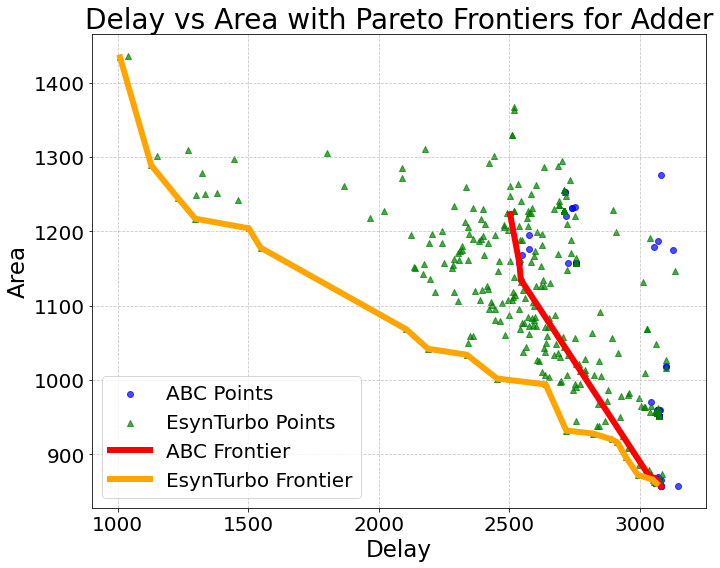

The reference point is [3484.0, 2909.0].
The Pareto points of ABC are [(1791.0, 2372.0), (1608.0, 2426.0), (1893.0, 2360.0), (2857.0, 2181.0), (1609.0, 2423.0), (2899.0, 2106.0)].
The Pareto points of EsynTurbo are [(1493.0, 2309.0), (1486.0, 2318.0), (1645.0, 2263.0), (1803.0, 2234.0), (1455.0, 2350.0), (1350.0, 2390.0)].
The hypervolume of ABC is 1173276.00, and the hypervolume of EsynTurbo is 1403904.00.
The hypervolume ratio of ABC/EsynTurbo is 0.84.


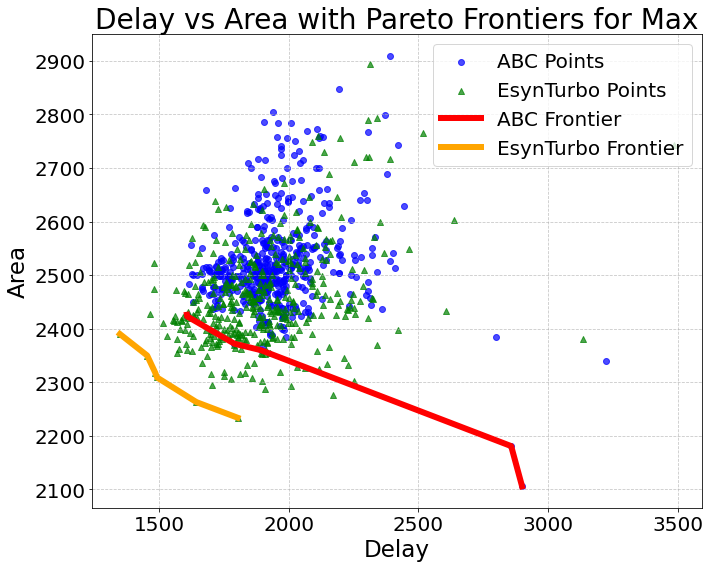

The reference point is [3071.0, 16207.0].
The Pareto points of ABC are [(2271.0, 15390.0), (2367.0, 15210.0), (2533.0, 14932.0), (2157.0, 15431.0), (2274.0, 15328.0), (2961.0, 14922.0), (2029.0, 15889.0), (2972.0, 14802.0), (2391.0, 15057.0), (2504.0, 14970.0), (2981.0, 14792.0), (2273.0, 15349.0)].
The Pareto points of EsynTurbo are [(2095.0, 15417.0), (2756.0, 14871.0), (2498.0, 15129.0), (2443.0, 15154.0), (2967.0, 14783.0), (2310.0, 15256.0), (2411.0, 15166.0), (2665.0, 14945.0), (2158.0, 15349.0), (2383.0, 15172.0), (2540.0, 14983.0)].
The hypervolume of ABC is 1102988.00, and the hypervolume of EsynTurbo is 1112926.00.
The hypervolume ratio of ABC/EsynTurbo is 0.99.


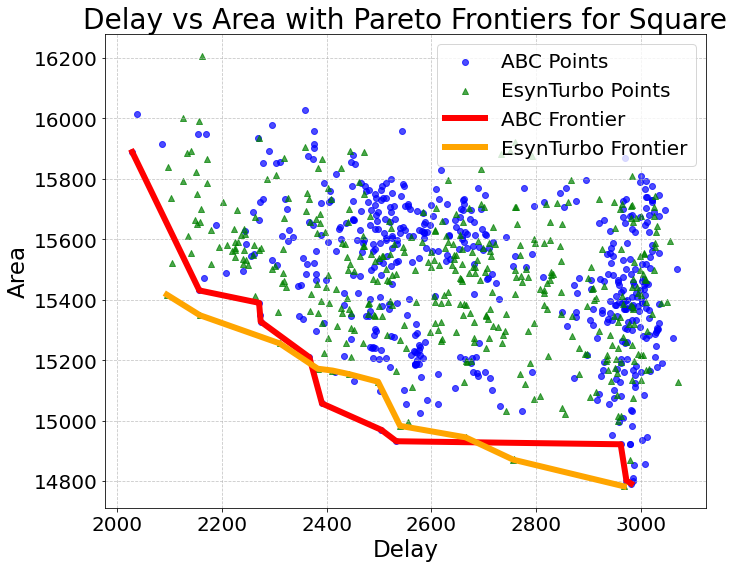

The reference point is [1019.0, 8701.0].
The Pareto points of ABC are [(896.0, 7764.0), (996.0, 4881.0), (810.0, 7804.0), (807.0, 7879.0), (728.0, 8641.0), (940.0, 6254.0), (930.0, 7701.0), (727.0, 8674.0), (871.0, 7771.0), (862.0, 7797.0), (926.0, 7755.0), (740.0, 7977.0)].
The Pareto points of EsynTurbo are [(727.0, 8457.0), (805.0, 7753.0), (892.0, 5255.0), (918.0, 4453.0), (726.0, 8504.0), (933.0, 4437.0)].
The hypervolume of ABC is 396537.00, and the hypervolume of EsynTurbo is 621725.00.
The hypervolume ratio of ABC/EsynTurbo is 0.64.


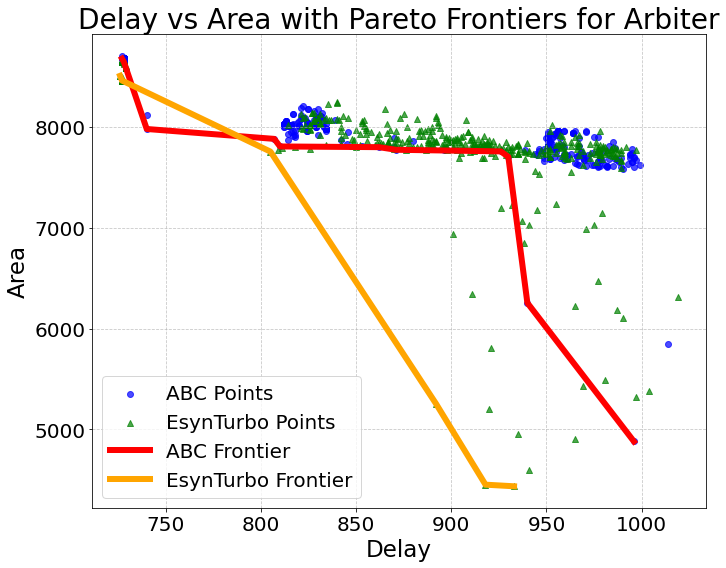

The reference point is [3674.0, 26467.0].
The Pareto points of ABC are [(3260.0, 21575.0), (3253.0, 22127.0), (3504.0, 20633.0), (3411.0, 21007.0), (3222.0, 22412.0), (3255.0, 21705.0), (3264.0, 21045.0), (3508.0, 20405.0), (3223.0, 22365.0), (3204.0, 22575.0), (3195.0, 22853.0)].
The Pareto points of EsynTurbo are [(3359.0, 21063.0), (2927.0, 21627.0), (3004.0, 21323.0), (3083.0, 21081.0), (2875.0, 21933.0), (2991.0, 21354.0)].
The hypervolume of ABC is 2616197.00, and the hypervolume of EsynTurbo is 4207169.00.
The hypervolume ratio of ABC/EsynTurbo is 0.62.


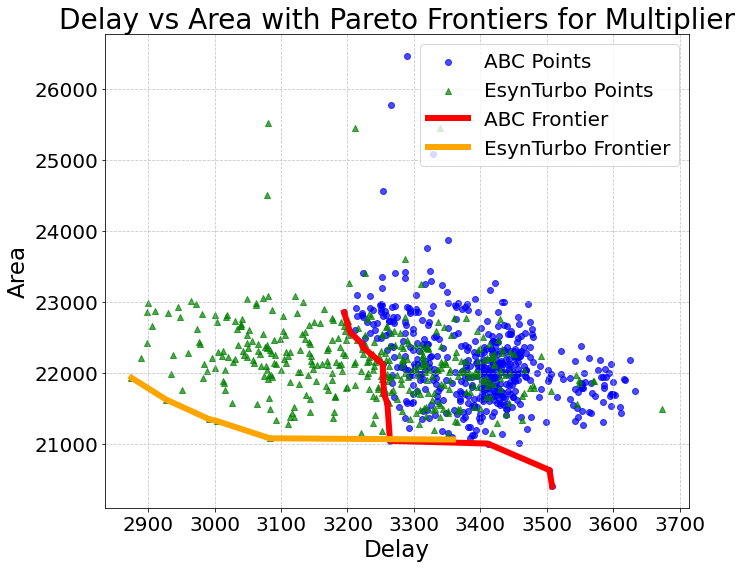

The reference point is [2677.0, 31810.0].
The Pareto points of ABC are [(1319.0, 22764.0), (1186.0, 23396.0), (1154.0, 25339.0), (1162.0, 23798.0), (1191.0, 23268.0), (1246.0, 22773.0), (1447.0, 22470.0), (1402.0, 22755.0), (1198.0, 23028.0)].
The Pareto points of EsynTurbo are [(1214.0, 22596.0), (1122.0, 24229.0), (1168.0, 23030.0), (1128.0, 23530.0), (1429.0, 22396.0)].
The hypervolume of ABC is 14073650.00, and the hypervolume of EsynTurbo is 14510248.00.
The hypervolume ratio of ABC/EsynTurbo is 0.97.


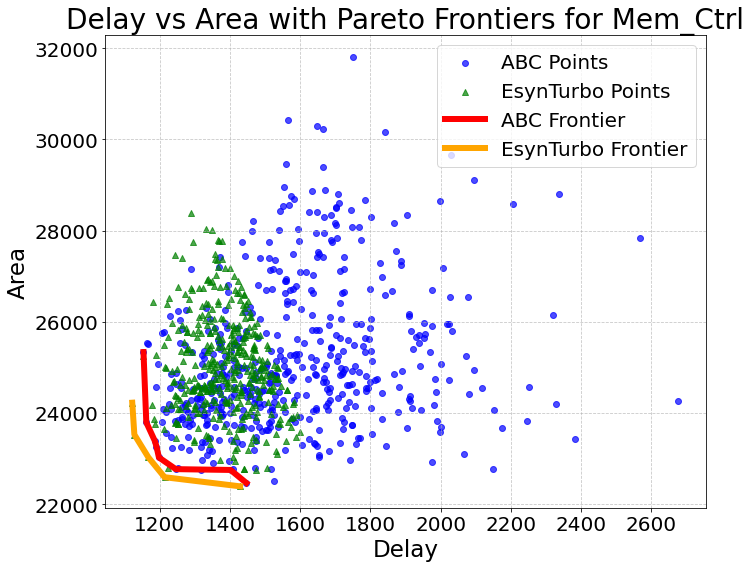

In [24]:
plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_adder_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_adder_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Adder',
    '../fuzz_abc_opt_flow/EPFL_adder_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_max_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_max_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Max',
    '../fuzz_abc_opt_flow/EPFL_max_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_square_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_square_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Square',
    '../fuzz_abc_opt_flow/EPFL_square_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_arbiter_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_arbiter_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Arbiter',
    '../fuzz_abc_opt_flow/EPFL_arbiter_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_multiplier_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_multiplier_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Multiplier',
    '../fuzz_abc_opt_flow/EPFL_multiplier_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_mem_ctrl_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_mem_ctrl_400.txt',
    None,
    'Delay vs Area with Pareto Frontiers for Mem_Ctrl',
    '../fuzz_abc_opt_flow/EPFL_mem_pareto.pdf'
)

## Generate HyperVolume plot for the results of E-synTurbo + Opts. , E-SynTurbo w.o. Opts., and ABC

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 0.47.
The reference point is [3145.0, 1663.0].
The Pareto points of ABC are [(3071.0, 861.0), (2544.0, 1135.0), (3073.0, 861.0), (3081.0, 857.0), (3068.0, 864.0), (2538.0, 1158.0), (3037.0, 870.0), (2503.0, 1223.0), (3060.0, 868.0), (3069.0, 861.0)].
The Pareto points of EsynTurbo are [(2337.0, 1034.0), (3050.0, 866.0), (2993.0, 872.0), (2188.0, 1042.0), (1009.0, 1434.0), (2820.0, 928.0), (3056.0, 863.0), (3061.0, 862.0), (2718.0, 932.0), (3064.0, 861.0), (2914.0, 916.0), (2945.0, 897.0), (1297.0, 1217.0), (1502.0, 1204.0), (2893.0, 920.0), (1547.0, 1178.0), (1230.0, 1245.0), (2106.0, 1068.0), (1128.0, 1289.0), (2453.0, 1002.0), (3060.0, 862.0), (2639.0, 994.0)].
The hypervolume of ABC is 365340.00, and the hypervolume of EsynTurbo is 1191665.00.
The hypervolume ratio of ABC/EsynTurbo is 0.31.


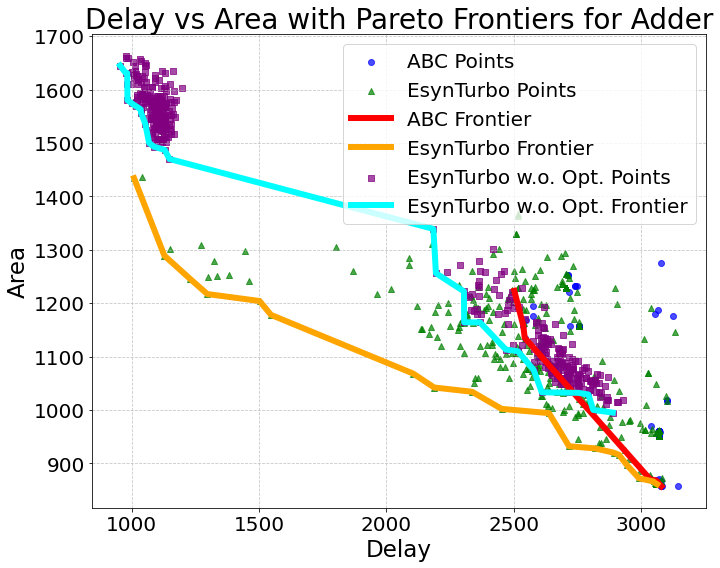

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 1.32.
The reference point is [4028.0, 3400.0].
The Pareto points of ABC are [(1791.0, 2372.0), (1608.0, 2426.0), (1893.0, 2360.0), (2857.0, 2181.0), (1609.0, 2423.0), (2899.0, 2106.0)].
The Pareto points of EsynTurbo are [(1493.0, 2309.0), (1486.0, 2318.0), (1645.0, 2263.0), (1803.0, 2234.0), (1455.0, 2350.0), (1350.0, 2390.0)].
The hypervolume of ABC is 2798328.00, and the hypervolume of EsynTurbo is 3086002.00.
The hypervolume ratio of ABC/EsynTurbo is 0.91.


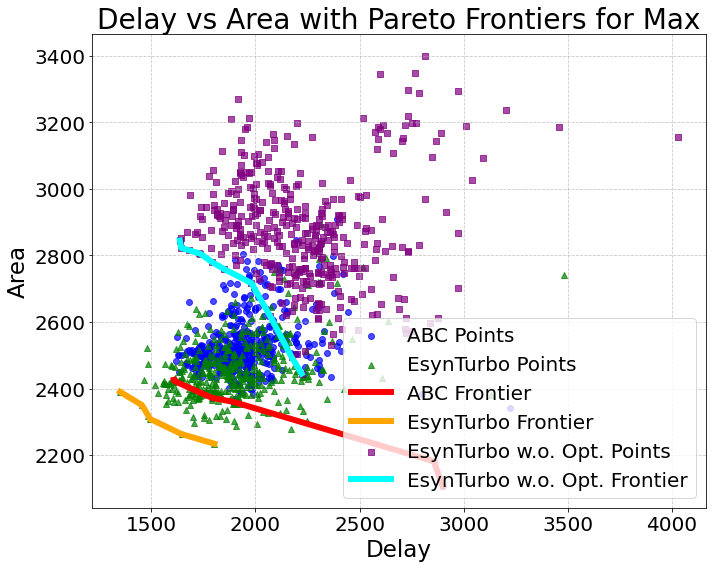

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 1.92.
The reference point is [3071.0, 20892.0].
The Pareto points of ABC are [(2271.0, 15390.0), (2367.0, 15210.0), (2533.0, 14932.0), (2157.0, 15431.0), (2274.0, 15328.0), (2961.0, 14922.0), (2029.0, 15889.0), (2972.0, 14802.0), (2391.0, 15057.0), (2504.0, 14970.0), (2981.0, 14792.0), (2273.0, 15349.0)].
The Pareto points of EsynTurbo are [(2095.0, 15417.0), (2756.0, 14871.0), (2498.0, 15129.0), (2443.0, 15154.0), (2967.0, 14783.0), (2310.0, 15256.0), (2411.0, 15166.0), (2665.0, 14945.0), (2158.0, 15349.0), (2383.0, 15172.0), (2540.0, 14983.0)].
The hypervolume of ABC is 5984758.00, and the hypervolume of EsynTurbo is 5685486.00.
The hypervolume ratio of ABC/EsynTurbo is 1.05.


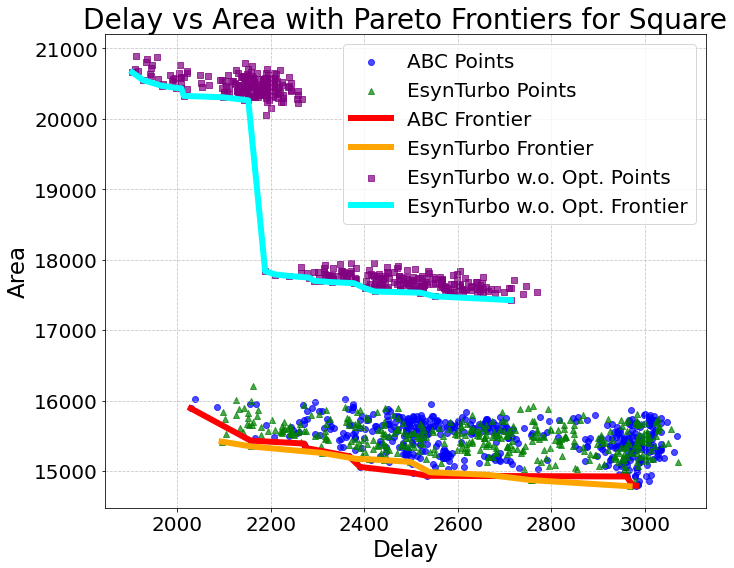

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 2.24.
The reference point is [1019.0, 8701.0].
The Pareto points of ABC are [(896.0, 7764.0), (996.0, 4881.0), (810.0, 7804.0), (807.0, 7879.0), (728.0, 8641.0), (940.0, 6254.0), (930.0, 7701.0), (727.0, 8674.0), (871.0, 7771.0), (862.0, 7797.0), (926.0, 7755.0), (740.0, 7977.0)].
The Pareto points of EsynTurbo are [(727.0, 8457.0), (805.0, 7753.0), (892.0, 5255.0), (918.0, 4453.0), (726.0, 8504.0), (933.0, 4437.0)].
The hypervolume of ABC is 396537.00, and the hypervolume of EsynTurbo is 621725.00.
The hypervolume ratio of ABC/EsynTurbo is 0.64.


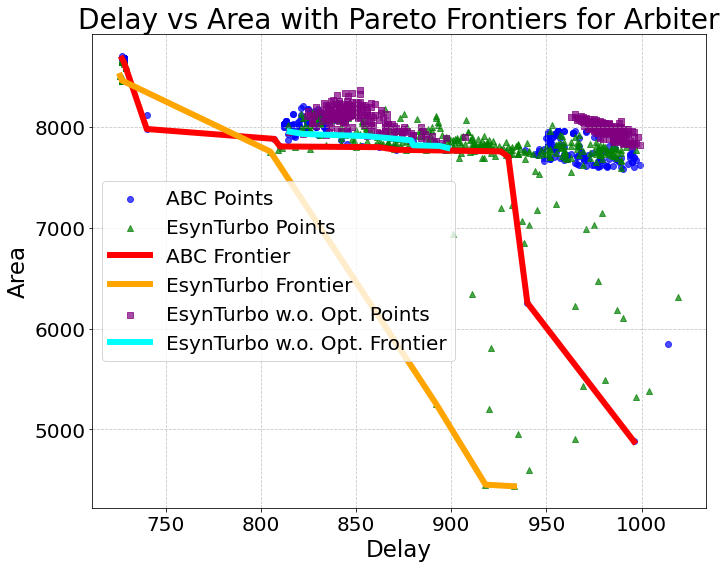

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 1.84.
The reference point is [3674.0, 31152.0].
The Pareto points of ABC are [(3260.0, 21575.0), (3253.0, 22127.0), (3504.0, 20633.0), (3411.0, 21007.0), (3222.0, 22412.0), (3255.0, 21705.0), (3264.0, 21045.0), (3508.0, 20405.0), (3223.0, 22365.0), (3204.0, 22575.0), (3195.0, 22853.0)].
The Pareto points of EsynTurbo are [(3359.0, 21063.0), (2927.0, 21627.0), (3004.0, 21323.0), (3083.0, 21081.0), (2875.0, 21933.0), (2991.0, 21354.0)].
The hypervolume of ABC is 4860312.00, and the hypervolume of EsynTurbo is 7950484.00.
The hypervolume ratio of ABC/EsynTurbo is 0.61.


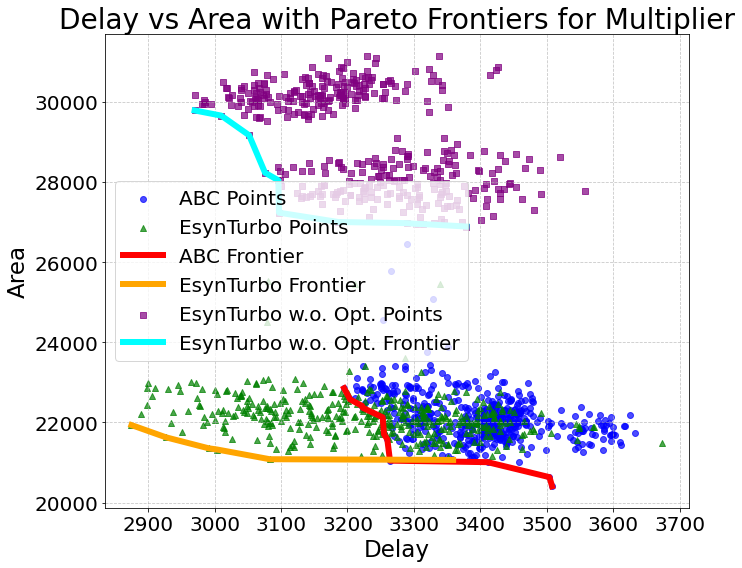

The hypervolume ratio of ABC/EsynTurbo w.o. Opt. is 136.74.
The reference point is [2677.0, 33242.0].
The Pareto points of ABC are [(1319.0, 22764.0), (1186.0, 23396.0), (1154.0, 25339.0), (1162.0, 23798.0), (1191.0, 23268.0), (1246.0, 22773.0), (1447.0, 22470.0), (1402.0, 22755.0), (1198.0, 23028.0)].
The Pareto points of EsynTurbo are [(1214.0, 22596.0), (1122.0, 24229.0), (1168.0, 23030.0), (1128.0, 23530.0), (1429.0, 22396.0)].
The hypervolume of ABC is 16254586.00, and the hypervolume of EsynTurbo is 16737008.00.
The hypervolume ratio of ABC/EsynTurbo is 0.97.


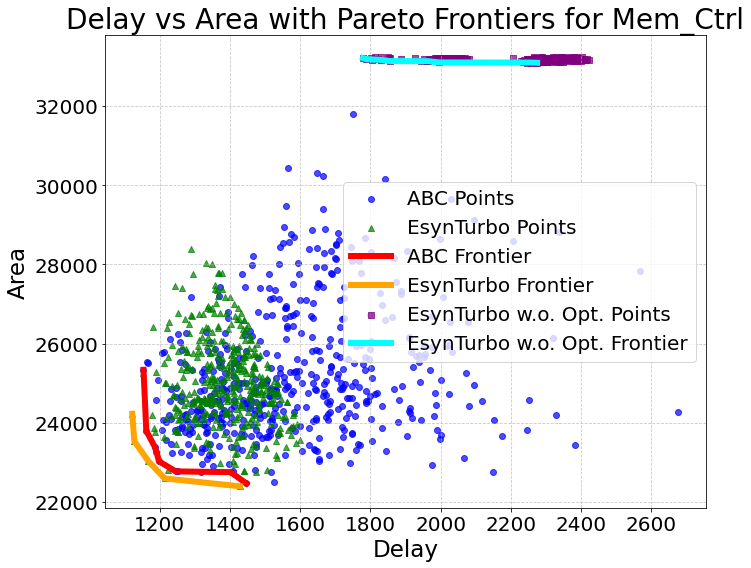

In [23]:
plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_adder_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_adder_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_adder_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Adder',
    '../fuzz_abc_opt_flow/EPFL_adder_detail_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_max_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_max_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_max_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Max',
    '../fuzz_abc_opt_flow/EPFL_max_detail_pareto.pdf'
    
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_square_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_square_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_square_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Square',
    '../fuzz_abc_opt_flow/EPFL_square_detail_pareto.pdf'
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_arbiter_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_arbiter_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_arbiter_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Arbiter',
    '../fuzz_abc_opt_flow/EPFL_arbiter_detail_pareto.pdf'    
)

plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_multiplier_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_multiplier_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_multiplier_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Multiplier',
    '../fuzz_abc_opt_flow/EPFL_multiplier_detail_pareto.pdf'
    
)


plot_pareto_frontier(
    '../fuzz_abc_opt_flow/log/stats_ori_mem_ctrl_500.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_mem_ctrl_400.txt',
    '../fuzz_abc_opt_flow/log/stats_opt_mem_ctrl_without_pass_400.txt',  # Optional
    'Delay vs Area with Pareto Frontiers for Mem_Ctrl',
    '../fuzz_abc_opt_flow/EPFL_mem_ctrl_detail_pareto.pdf'
)